# Описание проекта

Описание данных

Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. Скачать датасет
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста
Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача
- Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.duplicated().sum() # 0 дубликатов 

0

In [5]:
hypothesis.columns = hypothesis.columns.str.lower() # приведем данные к нижнему регистру

# Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
pd.options.display.max_colwidth = 150
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Судя по ICE наиболее перспективные гипотезы : "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", а наименее перспективная - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

# Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']).round(1)
pd.options.display.max_colwidth = 150
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Судя по RICE наиболее перспективные гипотезы:  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", наименее перспективная все также - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

# Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [8]:
hypothesis[['hypothesis', 'ICE', 'RICE']]

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


Ожидаемо, что ICE и RICE отличаются, поскольку в RICE присутствует "reach" 

Поскольку мы рассматриваем крупный интернет магазин, нам больше подойдет исход RICE, поскольку он включает в себе охват пользователей.

## Часть 2. Анализ A/B-теста

# Предобработка данных

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d') # приведем к формату дата

In [13]:
orders = orders.rename(columns={"transactionId": "order_id", "visitorId": "user_id"}) # переименуем столбцы 

In [14]:
orders['order_id'].value_counts() #1197 уникальных строк 

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: order_id, Length: 1197, dtype: int64

In [15]:
orders['user_id'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: user_id, Length: 1031, dtype: int64

In [16]:
orders['user_id'].count # получаем 1197 пользователей из них 1031 уникальных, самое большое число заказов у двух покупателей - по 11 заказов

<bound method Series.count of 0       3312258926
1       3642806036
2       4069496402
3       1196621759
4       2322279887
           ...    
1192    3733762160
1193     370388673
1194     573423106
1195    1614305549
1196    2108080724
Name: user_id, Length: 1197, dtype: int64>

In [17]:
orders['date'].value_counts()

2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-15    46
2019-08-06    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-22    41
2019-08-09    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

In [18]:
orders['date'].describe() # данные представлены за 31 день августа 2019 года, больше всего заказов было 5 августа - 48 заказов,
# а меньше всего 17-го и 25-го - по 24 заказа 

/tmp/ipykernel_106/2530440450.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['date'].describe() # данные представлены за 31 день августа 2019 года, больше всего заказов было 5 августа - 48 заказов,


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [19]:
orders['group'].value_counts() # в группе А у нас - 640 человек, а в группе B - 557

B    640
A    557
Name: group, dtype: int64

In [20]:
#проверим на дубликаты
orders[orders.duplicated()]

,order_id,user_id,date,revenue,group


In [21]:
pd.DataFrame(round((orders.isna().mean()*100))) # Дубликатов и нулевых значений не обнаружено

,0
order_id,0.0
user_id,0.0
date,0.0
revenue,0.0
group,0.0


In [22]:
visitors.head() # разберем visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d') # приведем к формату даты

In [25]:
visitors['date'].describe() # 62 строки, уникальных 31 т.к. даты повторяются для групп А и B

/tmp/ipykernel_106/1779580153.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors['date'].describe() # 62 строки, уникальных 31 т.к. даты повторяются для групп А и B


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [26]:
visitors['group'].value_counts() # равное количество записей в группах 

A    31
B    31
Name: group, dtype: int64

In [27]:
visitors['visitors'].describe() 

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Самое большое число посетителей 770, самое маленькое 361. Медианное и среднее значения близки: 607 и 624, сильных выбросов не ожидаем

In [28]:
visitors[visitors.duplicated()]

,date,group,visitors


In [29]:
pd.DataFrame(round((visitors.isna().mean()*100)))# дубликатов и нулевых значение нет

,0
date,0.0
group,0.0
visitors,0.0


In [30]:
# отбираем группы из данных с заказами 
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
two_groups = list(np.intersect1d(group_a['user_id'], group_b['user_id']))

In [31]:
len(two_groups)

58

In [92]:
two_groups_clear = orders.query('user_id not in @two_groups')

# Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [33]:
groups = orders[['date','group']].drop_duplicates() #датафрейм с уникальными значениями

In [34]:
groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [35]:
orders.head()

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [36]:
orders_group = groups.apply(  #создадим функцию агрегированных куммилятивных по дням
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': pd.Series.nunique,
            'user_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [37]:
orders_group.head()

,date,group,order_id,user_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [38]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [39]:
visitors_group = groups.apply( # создадим функцию по посетителям
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [40]:
visitors_group.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [41]:
cumulative_total = orders_group.merge( # объеденим данные в одной таблице 
    visitors_group, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_total.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [42]:
cumulative_total.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [43]:
cumulative_a  = cumulative_total[cumulative_total['group']=='A'][['date','revenue', 'orders']] # датафрейм для группы А
cumulative_a.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [44]:
cumulative_b  = cumulative_total[cumulative_total['group']=='B'][['date','revenue', 'orders']] # датафрейм для группы B
cumulative_b.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


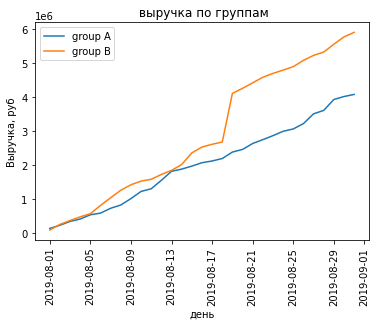

In [45]:
# строим график
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='group A')

plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='group B')

plt.xticks(rotation=90)
plt.legend() 
plt.title(' выручка по группам')
plt.xlabel('день')
plt.ylabel('Выручка, руб')

plt.show()

По графикам видим , что у обоих групп выручка растет по ходе теста, но у группы B между 17 и 21 числом заметен сильный скачок, возможно это связанно с появлении дорогих заказов или об общем увеличении заказов в этот период

# Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

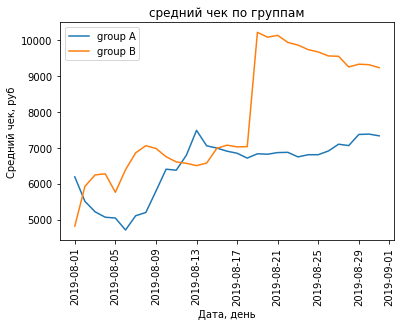

In [46]:
plt.plot(cumulative_a['date'], cumulative_a['revenue']/cumulative_a['orders'], label='group A')
plt.plot(cumulative_b['date'], cumulative_b['revenue']/cumulative_b['orders'], label='group B')
plt.xticks(rotation=90)
plt.title('средний чек по группам')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend() 

plt.show()

Средний чек у обеих групп достаточно не стабилен:
- У группы А мы видим в начале небольшой спад, после чего идет активный рост вплоть до 13 августа, а дальше небольшие изменения до конца периода
- В группе B мы видим спокойный рост с небольшими просадками вплоть до приблизительно 19 августа, после чего резкий рост до 10000 в период 1-2 дня, а после наблюдаем медленный спад до конца периода

Для выводов требуется дополнительный анализ

# Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [47]:
# объединим таблицы
revenue_ab = cumulative_a.merge(cumulative_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [48]:
revenue_ab.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


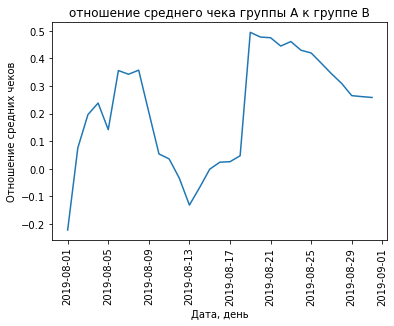

In [49]:
# cтроим график
plt.plot(revenue_ab ['date'], (revenue_ab ['revenueB']/revenue_ab ['ordersB'])/(revenue_ab ['revenueA']/revenue_ab ['ordersA'])-1)
plt.xticks(rotation=90)
plt.title('отношение среднего чека группы А к группе B')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков')

plt.show()

График несколько раз резко меняется то в рост то в спад, скорей всего в эти даты были крупные заказы.

# Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [50]:
cumulative_total['conversion'] = cumulative_total['orders']/cumulative_total['visitors'] # добавим столбец конверсии
cumulative_total.head(10)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
5,2019-08-03,B,61,59,380996,1803,0.033833
6,2019-08-04,A,84,77,425699,2562,0.032787
7,2019-08-04,B,78,75,489567,2573,0.030315
8,2019-08-05,A,109,100,549917,3318,0.032851
9,2019-08-05,B,101,98,581995,3280,0.030793


In [51]:
# обозначим группы 
conversion_a = cumulative_total[cumulative_total['group']=='A']
 

conversion_b = cumulative_total[cumulative_total['group']=='B']

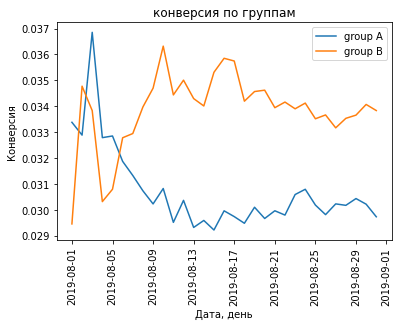

In [52]:
# строим графики
plt.plot(conversion_a['date'], conversion_a['conversion'], label='group A')
plt.plot(conversion_b['date'], conversion_b['conversion'], label='group B')
plt.legend()
plt.xticks(rotation=90)
plt.title("конверсия по группам")
plt.xlabel('Дата, день')
plt.ylabel('Конверсия')

plt.show()

Судя по графику:
- Изначально конверсия группы А была больше, но после роста длинной примерно в 1-2 дня (2-3 августа), пошел спад в плоть до 9 августа, а дальше конверсия держалась примерно на одном уровне (около 0.03)
- В группе B наоборот конверсия изначально была ниже, потом в теже дни произошел подъем и спад, после чего конверсия начала рости вплоть до приблизительно 11-го числа, после пошел небольшой спад, но конверсия держалась примерно на одном уровне (0.034)

# Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [53]:
#объединим таблицы 
conversion_ab = conversion_a[['date','conversion']].merge( 
    conversion_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
conversion_ab.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


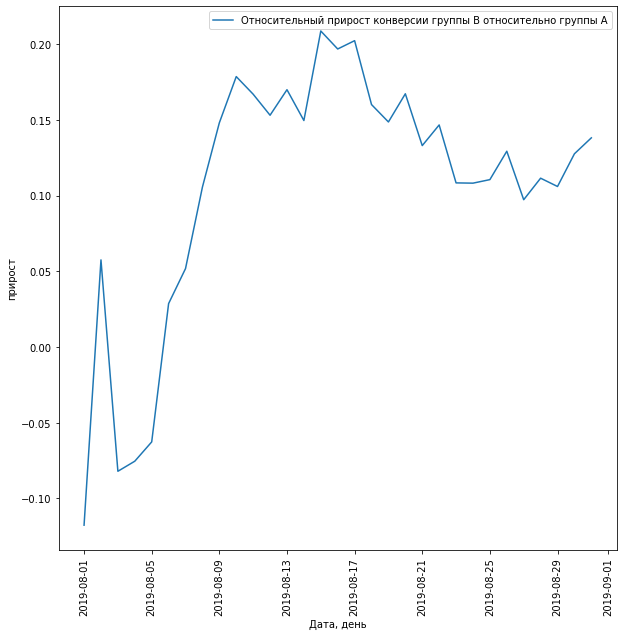

In [54]:
# строим график 
plt.figure(figsize=(10,10))
plt.plot(
    conversion_ab['date'], conversion_ab['conversionB']/conversion_ab['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()
plt.xlabel('Дата, день')
plt.ylabel('прирост')

plt.xticks(rotation=90)


plt.show()

Судя по графику: в начале конверсия группы B была ниже после чего произошел резкий подъем и спуск, после 3 августа пошел подъем примерно до 15 августа, дальше конверсия уравнялась постепенно падая но держась на уровне примерно 0.13, что все еще выше группы А

# Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [55]:
# создадим датафрейм количества заказов по пользователям
users_orders = (
    two_groups_clear.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)

users_orders.columns = ['user_id', 'orders']

users_orders.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


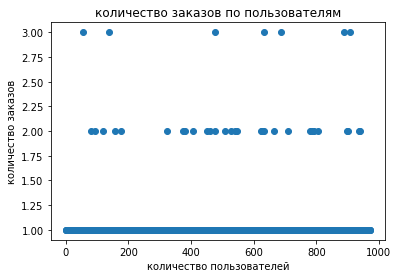

In [56]:
#строим график
x_values = pd.Series(range(0, len(users_orders)))

plt.scatter(x_values, users_orders['orders']) 

plt.title('количество заказов по пользователям')
plt.xlabel('количество пользователей')
plt.ylabel('количество заказов')
plt.show()

# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [57]:
print(np.percentile(users_orders['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали больше одного заказа. И не более 1% пользователей - больше двух заказов.

# Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

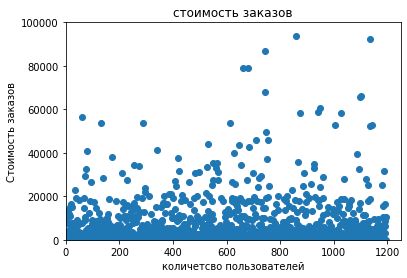

In [58]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('стоимость заказов')
plt.xlabel('количетсво пользователей')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1250, 0, 100000])

plt.show()

Видим небольшое количество дорогих заказов

# Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [59]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233 т.р.

# Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [60]:
# получаем  данные по дням о группе А
visitors_day_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_day_a.columns = ['date', 'visitors_a']
visitors_day_a.head()

,date,visitors_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [61]:
visitors_total_a = visitors_day_a.apply(
    lambda x: visitors_day_a[visitors_day_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_a': 'sum'}
    ),
    axis=1,
)
visitors_total_a.columns = ['date', 'visitors_total_a']
visitors_total_a.head()

,date,visitors_total_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [62]:
# получаем  данные по дням о группе B
visitors_day_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_day_b.columns = ['date', 'visitors_b']
visitors_day_b.head()

,date,visitors_b
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [63]:
visitors_total_b = visitors_day_b.apply(
    lambda x: visitors_day_b[visitors_day_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_b': 'sum'}
    ),
    axis=1,
)
visitors_total_b.columns = ['date', 'visitors_total_b']
visitors_total_b.head()

,date,visitors_total_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [64]:
# данные о заказах и выручке группы А по дням
orders_day_a = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_day_a.columns = ['date', 'orders_a', 'revenue_a']
orders_day_a.head()

,date,orders_a,revenue_a
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [65]:
# получаем кумулятивные о заказах и выручке группы А по дням
cumulative_orders_a = orders_day_a.apply(
    lambda x: orders_day_a[orders_day_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_a': 'sum', 'revenue_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

cumulative_orders_a.columns = [
    'date',
    'cumulative_orders_a',
    'cumulative_revenue_a',
]

cumulative_orders_a.head()

,date,cumulative_orders_a,cumulative_revenue_a
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [66]:
# данные о заказах и выручке группы B по дням
orders_day_b = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_day_b.columns = ['date', 'orders_b', 'revenue_b']
orders_day_b.head()

,date,orders_b,revenue_b
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [67]:
# получаем кумулятивные о заказах и выручке группы B по дням
cumulative_orders_b = orders_day_b.apply(
    lambda x: orders_day_b[orders_day_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_b': 'sum', 'revenue_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

cumulative_orders_b.columns = [
    'date',
    'cumulative_orders_b',
    'cumulative_revenue_b',
]

cumulative_orders_b.head()

,date,cumulative_orders_b,cumulative_revenue_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [68]:
# Объединяем данные
data = (
    orders_day_a.merge(
        orders_day_b, left_on='date', right_on='date', how='left'
    )
    .merge(cumulative_orders_a, left_on='date', right_on='date', how='left')
    .merge(cumulative_orders_b, left_on='date', right_on='date', how='left')
    .merge(visitors_day_a, left_on='date', right_on='date', how='left')
    .merge(visitors_day_b, left_on='date', right_on='date', how='left')
    .merge(visitors_total_a, left_on='date', right_on='date', how='left')
    .merge(visitors_total_b, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_a,revenue_a,orders_b,revenue_b,cumulative_orders_a,cumulative_revenue_a,cumulative_orders_b,cumulative_revenue_b,visitors_a,visitors_b,visitors_total_a,visitors_total_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные с пользователями имевшими хотя бы 1 заказ и количеством их заказов

In [69]:
users_with_orders_a = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
users_with_orders_a.columns = ['user_id', 'orders']
users_with_orders_a.head(10)

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
5,85103373,1
6,87885904,1
7,109615108,1
8,130417038,1
9,132143192,1


In [70]:
users_with_orders_b = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
users_with_orders_b.columns = ['user_id', 'orders']
users_with_orders_b.head(10)

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
5,48147722,1
6,56960363,1
7,71018815,1
8,78678012,1
9,91069833,1


Подготовим данные к проверке методом Уилкоксона-Манна-Уитни

In [71]:
tabl_for_group_a = pd.concat(
    [
        users_with_orders_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_a'].sum() - len(users_with_orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
tabl_for_group_a.count()

18736

In [72]:
tabl_for_group_b = pd.concat(
    [
        users_with_orders_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_b'].sum() - len(users_with_orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
tabl_for_group_b.count()

18916

Сформулируем гипотезы:

H0 - статистическая значимость различий в конверсии между группами по «сырым» данным не значима

H1 - статистическая значимость различий в конверсии между группами по «сырым» данным  значима

Alpha примем за 0.05

In [73]:
increase_conversion = (stats.mannwhitneyu(tabl_for_group_a, tabl_for_group_b)[1])
print("P-value по конверсии до очистки данных : {0:.3f}".format(increase_conversion))

P-value по конверсии до очистки данных : 0.878


In [74]:
display("Относительный прирост конверсии группы B {0:.1%}".format((orders_day_b['orders_b'].sum()/visitors_day_b['visitors_b'].sum())
                       /(orders_day_a['orders_a'].sum()/visitors_day_a['visitors_a'].sum())-1))

'Относительный прирост конверсии группы B 13.8%'

In [75]:
alpha = .05

if (increase_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


P-value больше 0.05, поэтому не отвергаем нулевую гипотезу. Анализ сырых данных показывает,что различия в конверсии между группами не значимы. Относительный прирост конверсии группы B к конверсии группы А равен 13.8%.

# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 0.05.

In [76]:
avg_check = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('P-value по среднему чеку до очистки данных: {0:.3f}'.format(avg_check))

P-value по среднему чеку до очистки данных: 0.729


In [77]:
display("Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: {0:.1%}"
        .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: 25.9%'

In [78]:
alpha = .05

if (avg_check < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

Не получилось отвергнуть нулевую гипотезу


P-value больше 0.05, значит  различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы. Относительное различие среднего чека между группами 2.6%.

# Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

- 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям.
- 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами.

Сформулируем гипотезы

Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы

Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 0.05.

In [79]:
anomaly_pay = orders[orders['revenue'] > 28000]['user_id'] # сколько пользователей заплатили больше 28000
display(anomaly_pay.shape)

(60,)

посмотрим сколько пользователей имеют больше 2-ух заказов

In [80]:
users_with_orders = orders.drop(['group', 'revenue', 'date'], axis=1)

In [81]:
users_with_orders = users_with_orders.groupby('user_id').agg({'order_id':'nunique'}).reset_index()
users_with_orders.columns = ['user_id','orders']
display(users_with_orders.sort_values(by='orders',ascending=False).head(10))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [82]:
anomaly_orders = users_with_orders[users_with_orders['orders'] > 2]['user_id']
display(anomaly_orders.shape)

(30,)

In [83]:
# объединим этих пользователей
much_orders_users = pd.concat([users_with_orders_a[users_with_orders_a['orders'] > 2]['user_id'],
                                 users_with_orders_b[users_with_orders_b['orders'] > 2]['user_id']], axis = 0)
display(much_orders_users.head())
exp_orders = orders[orders['revenue'] > 28000]['user_id']

abnormal_users = pd.concat([much_orders_users, exp_orders], axis = 0).drop_duplicates().sort_values()
display(abnormal_users.head())

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: user_id, dtype: int64

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: user_id, dtype: int64

In [84]:
filtered_sample_a = pd.concat([users_with_orders_a[np.logical_not(users_with_orders_a['user_id'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visitors_day_a['visitors_a'].sum() - len(users_with_orders_a['orders'])),
                                       name='orders')],axis=0)
filtered_sample_b = pd.concat([users_with_orders_b[np.logical_not(users_with_orders_b['user_id'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visitors_day_b['visitors_b'].sum() - len(users_with_orders_b['orders'])),
                                       name='orders')],axis=0)


In [85]:
clean_conversion = (stats.mannwhitneyu(filtered_sample_a, filtered_sample_b)[1])
print('P-value по конверсии после очистки данных: {0:.5f}'.format(clean_conversion))

P-value по конверсии после очистки данных: 0.01304


In [86]:
print("Относительный прирост конверсии группы B к конверсии группы А после очистки данных: {0:.1%}".format(filtered_sample_b.mean()/filtered_sample_a.mean()-1))

Относительный прирост конверсии группы B к конверсии группы А после очистки данных: 17.3%


In [87]:
alpha = .05

if (clean_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Сегмент B лучше сегмента А. Очищенная Конверсия группы В больше чем конверсия группы А на 17.3%

# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 0.05.

In [88]:
avg_check_clean = (stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'])[1])
print('P-value по среднему чеку после очистки данных: {0:.3f}'.format(avg_check_clean))

P-value по среднему чеку после очистки данных: 0.738


In [89]:
print("Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: {0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'].mean() - 1)) 

Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -2.0%


In [90]:
alpha = .05

if (avg_check_clean < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы, Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -2.0%

# Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Нужно остановить тест и признать победу группы B, несмотря на то, что по среднему чеку статистической значимости не обнаружено,  поскольку конверсия влияет на выручку, а группа B лучше группы A по конверсии. 

# Общий вывод:

- Проведена приоритезация гипотез
- Изучены кумулятивные метрики
- Посчитана статистическая значимость различий в конверсии между группами по «сырым» данным. (Анализ сырых данных показывает,что различия в конверсии между группами не значимы. Относительный прирост конверсии группы B к конверсии группы А равен 13.8%.)
- Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. (различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы. Относительное различие среднего чека между группами 2.6%.)
- Посчитана статистическая значимость различий в конверсии между группами по «очищенным» данным. (Сегмент B лучше сегмента А. Очищенная Конверсия группы В больше чем конверсия группы А на 17.3%)
- Посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.(Различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы, Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -2.0%)